In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/sales_data_clean.csv')

In [3]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ordernumber       2823 non-null   int64  
 1   quantityordered   2823 non-null   int64  
 2   priceeach         2823 non-null   float64
 3   orderlinenumber   2823 non-null   int64  
 4   sales             2823 non-null   float64
 5   orderdate         2823 non-null   object 
 6   status            2823 non-null   object 
 7   qtr_id            2823 non-null   int64  
 8   month_id          2823 non-null   int64  
 9   year_id           2823 non-null   int64  
 10  productline       2823 non-null   object 
 11  msrp              2823 non-null   int64  
 12  productcode       2823 non-null   object 
 13  customername      2823 non-null   object 
 14  phone             2823 non-null   object 
 15  addressline1      2823 non-null   object 
 16  addressline2      302 non-null    object 


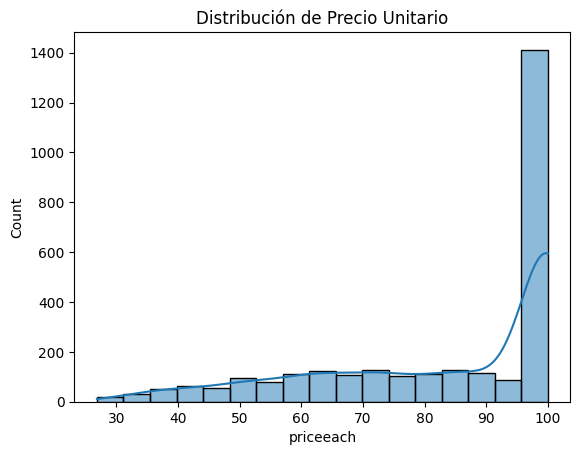

In [4]:
# Histograma de precios unitarios
sns.histplot(df['priceeach'], kde=True)
plt.title('Distribución de Precio Unitario')
plt.show()

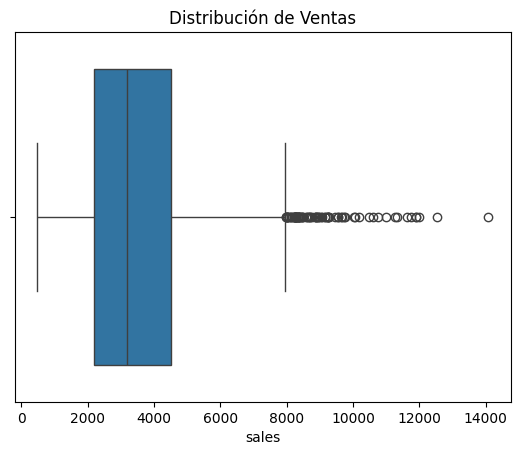

In [5]:
# Boxplot de ventas
sns.boxplot(x=df['sales'])
plt.title('Distribución de Ventas')
plt.show()

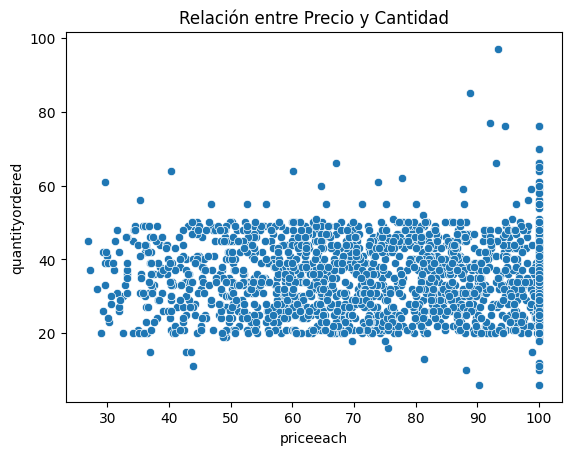

In [20]:
# Scatterplot: Precio vs Cantidad
sns.scatterplot(x='priceeach', y='quantityordered', data=df)
plt.title('Relación entre Precio y Cantidad')
plt.savefig('../output/Scatterplot.png')
plt.show()

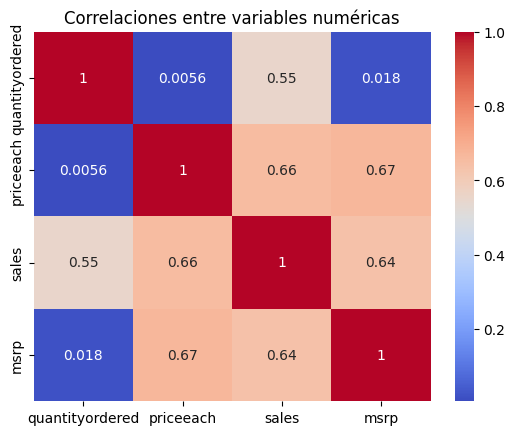

In [19]:
# Mapa de calor de correlaciones
corr = df[['quantityordered','priceeach','sales','msrp']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlaciones entre variables numéricas')
plt.savefig('../output/correlation_heatmap.png')
plt.show()

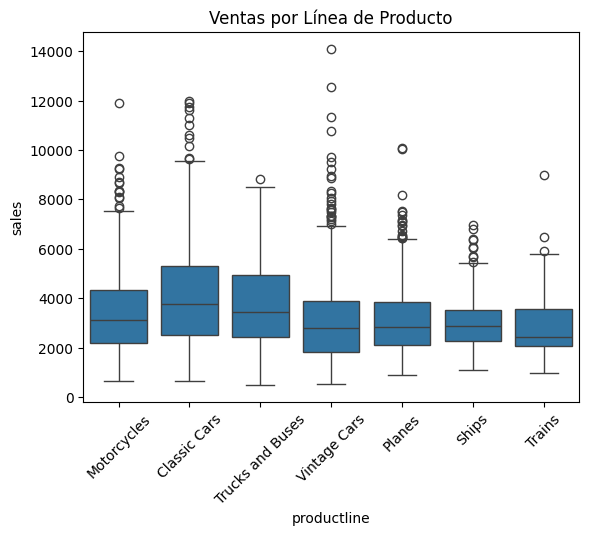

In [8]:
# Ventas por línea de producto
sns.boxplot(x='productline', y='sales', data=df)
plt.title('Ventas por Línea de Producto')
plt.xticks(rotation=45)
plt.show()

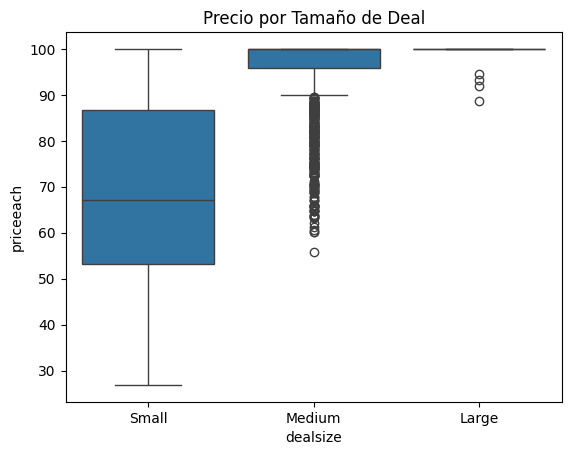

In [9]:
# Precio unitario por tamaño de deal
sns.boxplot(x='dealsize', y='priceeach', data=df)
plt.title('Precio por Tamaño de Deal')
plt.show()

In [10]:
# Convertir fechas
df['orderdate'] = pd.to_datetime(df['orderdate'])

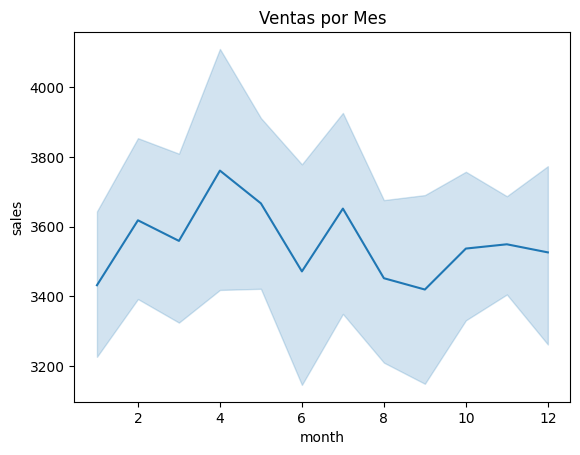

In [11]:
# Ventas por mes
df['month'] = df['orderdate'].dt.month
sns.lineplot(x='month', y='sales', data=df)
plt.title('Ventas por Mes')
plt.show()

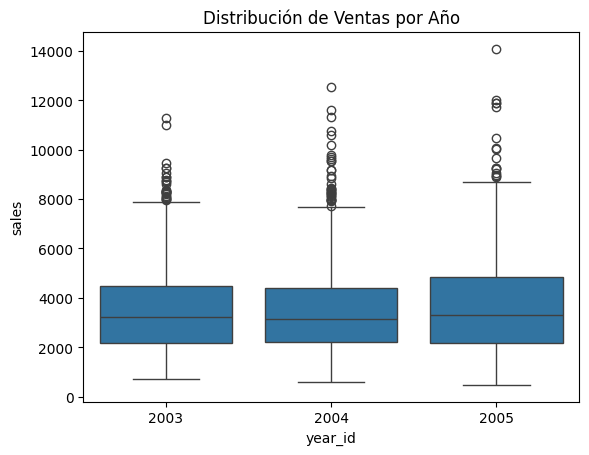

In [12]:
# Ventas por año
sns.boxplot(x='year_id', y='sales', data=df)
plt.title('Distribución de Ventas por Año')
plt.show()

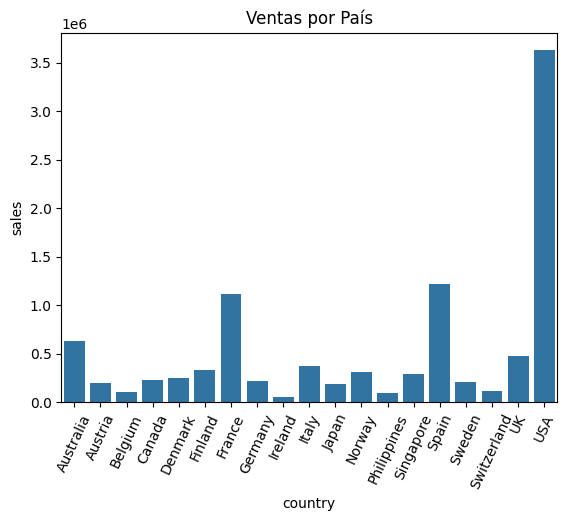

In [21]:
# Ventas por país
sns.barplot(x='country', y='sales', data=df.groupby('country')['sales'].sum().reset_index())
plt.title('Ventas por País')
plt.xticks(rotation=65)
plt.savefig('../output/Sales_by_Country.png')
plt.show()

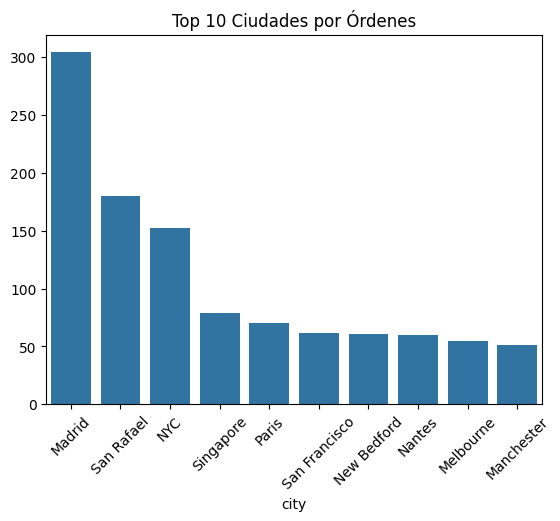

In [14]:
# Cantidad de órdenes por ciudad
top_cities = df['city'].value_counts().nlargest(10)
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 10 Ciudades por Órdenes')
plt.xticks(rotation=45)
plt.show()